### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D

### Load Data

In [2]:
# Look of the digit data use to train the model
digit = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
digit.groupby(by="label").count()['pixel0']

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: pixel0, dtype: int64

In [5]:
digit_symbole = digit.drop('label', axis=1)
digit_label = digit['label']
digit_train, digit_val, label_train, label_val = train_test_split(digit_symbole, digit_label, test_size=0.2, random_state=42, stratify=digit['label'])

In [6]:
# reshape the data
digit_rs_train = digit_train.values.reshape(-1, 28, 28, 1)
digit_rs_val = digit_val.values.reshape(-1, 28, 28, 1)
label_rs_train = label_train.values.reshape(-1, 1)
label_rs_val = label_val.values.reshape(-1, 1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train = enc.fit_transform(label_rs_train).toarray()
y_val = enc.fit_transform(label_rs_val).toarray()

### Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

In [9]:
norm_digit_train = digit_rs_train/255.0
train_data = datagen.flow(norm_digit_train, y_train, batch_size=64)
val_data = (digit_rs_val/255.0, y_val)

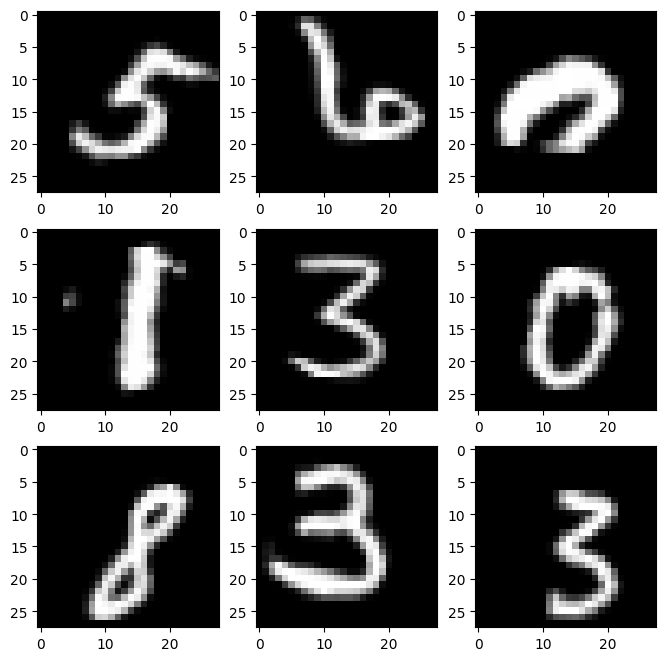

In [10]:
plt.figure(figsize=(8, 8))
X_gen, y_gen = train_data[0]
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_gen[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

### Build CNN Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(AveragePooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(AveragePooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_data, epochs=60, validation_data=val_data)

Epoch 1/60
525/525 [==============================] - 39s 70ms/step - loss: 0.2825 - accuracy: 0.9132 - val_loss: 1.0509 - val_accuracy: 0.6746
Epoch 2/60
525/525 [==============================] - 36s 69ms/step - loss: 0.1026 - accuracy: 0.9682 - val_loss: 0.0488 - val_accuracy: 0.9840
Epoch 3/60
525/525 [==============================] - 36s 69ms/step - loss: 0.0849 - accuracy: 0.9736 - val_loss: 0.0388 - val_accuracy: 0.9889
Epoch 4/60
525/525 [==============================] - 37s 70ms/step - loss: 0.0713 - accuracy: 0.9778 - val_loss: 0.0356 - val_accuracy: 0.9880
Epoch 5/60
525/525 [==============================] - 37s 70ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 6/60
525/525 [==============================] - 40s 75ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0295 - val_accuracy: 0.9910
Epoch 7/60
525/525 [==============================] - 38s 71ms/step - loss: 0.0516 - accuracy: 0.9831 - val_loss: 0.0297 - val_accuracy:

### Plot Loss and Accuracy

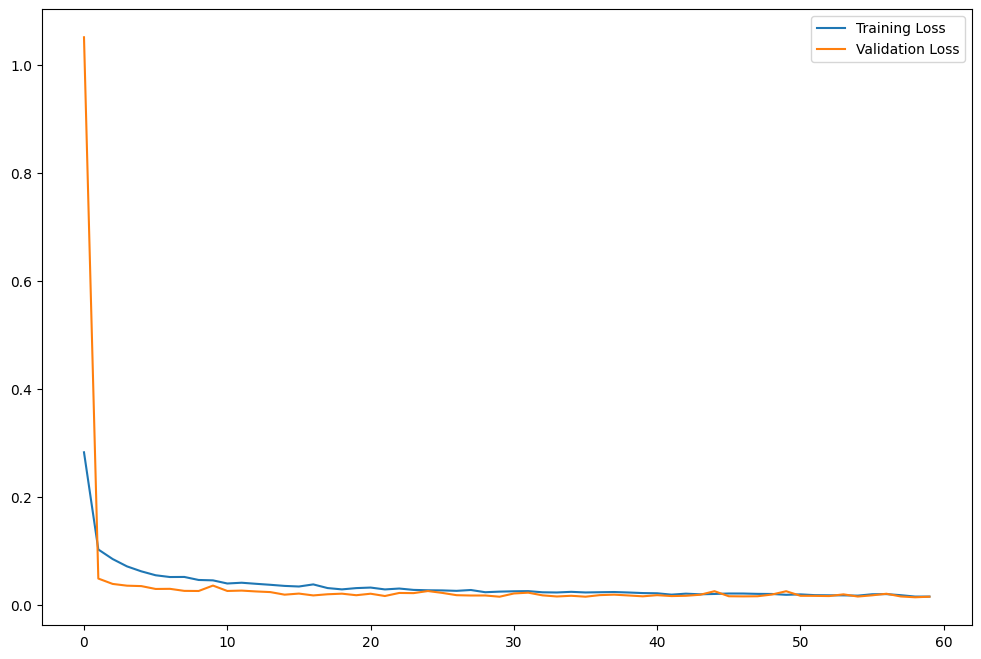

In [15]:
# graph the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

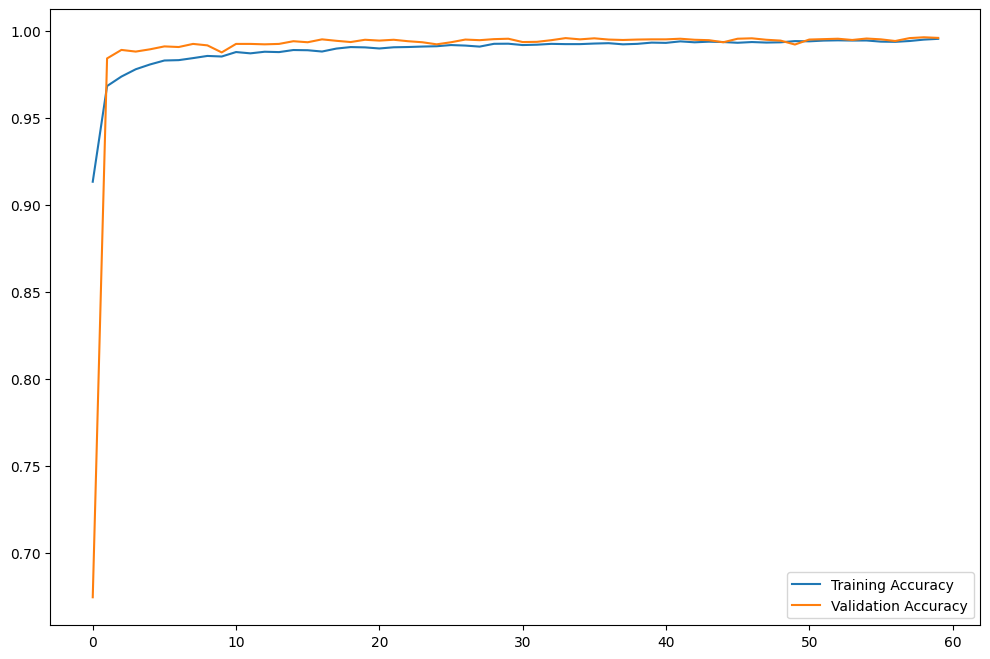

In [16]:
# plot the accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

263/263 [==============================] - 3s 10ms/step


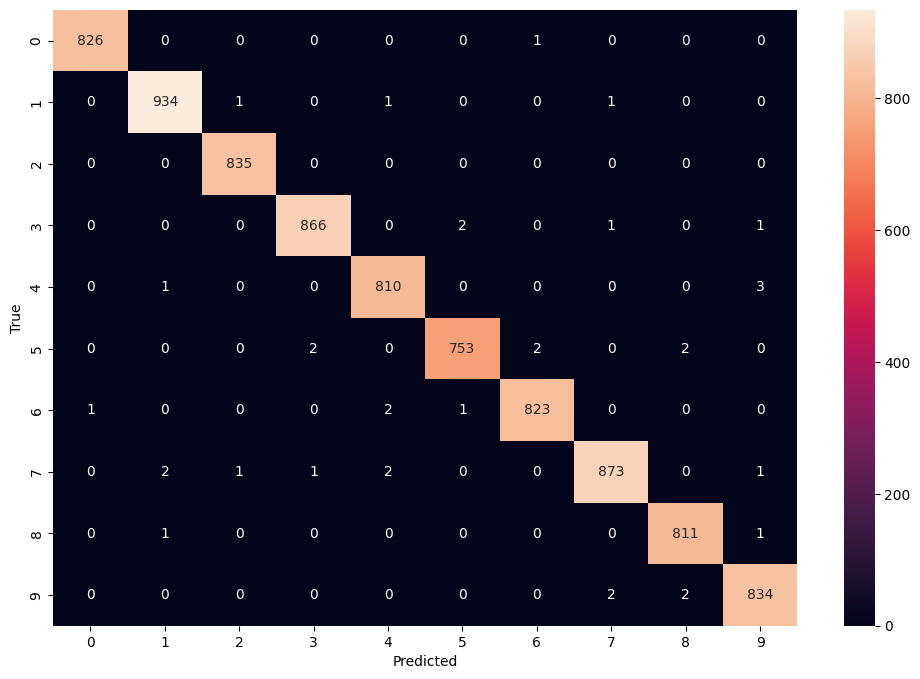

In [17]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(digit_rs_val/255.0)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d')
# axis labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Submit

In [18]:
# Load and preprocess test data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data = test_data.values.reshape(-1, 28, 28, 1)
test_data = test_data / 255.0

# Make predictions
predictions = model.predict(test_data)
resized_predictions = predictions.argmax(axis=1).reshape(-1, 1)

875/875 [==============================] - 9s 10ms/step


In [19]:
# Assuming resized_predictions is a 2D NumPy array
flat_predictions = resized_predictions.flatten()  # Flatten to a 1D array

# Create a submission DataFrame
submission = pd.DataFrame({'ImageId': range(1, len(test_data) + 1), 'Label': flat_predictions})

# Save the submission to a CSV file
submission.to_csv('/kaggle/working/submission.csv', index=False)